In [ ]:
# connect to drive
import os
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
import cv2
import os
import keras
from zipfile import *

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras import layers

from keras import backend as K
from keras.metrics import categorical_crossentropy
from keras.models import Model, Sequential, load_model
from keras.layers import Dense, GlobalAveragePooling2D, Dropout, MaxPooling2D, Flatten, Conv2D
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.python.lib.io import file_io

%matplotlib inline

from keras.models import Sequential
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
#from keras_vggface.vggface import VGGFace
from keras.utils import plot_model
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import *
from keras.layers import Input, Flatten, Dense, Activation, Conv2D, MaxPool2D, BatchNormalization, Dropout, MaxPooling2D
import skimage
from skimage.transform import rescale, resize
from sklearn.model_selection import train_test_split
import pydot
import shutil

In [ ]:
train_data_dir =  '/content/drive/MyDrive/emotion/CK+48/'

In [ ]:
pip install split-folders

In [ ]:
import splitfolders
splitfolders.ratio(train_data_dir, output="/content/drive/MyDrive/emotion/", seed=1337, ratio=(.8, 0.1,0.1))

Copying files: 981 files [01:09, 14.05 files/s]


In [ ]:
# Set up data directory and image size
test_data_dir = '/content/drive/MyDrive/emotion/test/'
train_data_dir = '/content/drive/MyDrive/emotion/train/'
validation_data_dir = '/content/drive/MyDrive/emotion/val/'
target_size = (256,256)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

#image data augmentation
train_generator = train_datagen.flow_from_directory(
   train_data_dir, #path to the training images
   target_size=target_size, # resize the images to the specified dimensions.
   color_mode='rgb',
   # batch_size -> enter 32 images by 32 to not be crash
   batch_size=32,
   class_mode='categorical',# categorical -> more than two classe(7) >happy,sad,..
   shuffle=True)


validation_generator = train_datagen.flow_from_directory(
    validation_data_dir, # same directory as training data
    target_size=target_size,
    color_mode='rgb',
    # batch_size -> enter 32 images by 32 to not be crash
    batch_size=32,
    class_mode='categorical', # categorical -> more than two classe(7) >happy,sad,..
    shuffle=True)



test_generator =  train_datagen.flow_from_directory(
    test_data_dir,
    target_size=target_size,
    color_mode='rgb',
    batch_size=32,
    class_mode='categorical',shuffle=True)

Found 783 images belonging to 7 classes.
Found 94 images belonging to 7 classes.
Found 104 images belonging to 7 classes.


In [ ]:
#layer above layers
#takes list of layers
model = tf.keras.Sequential([
  #1. no. of features/filters(difference between classes , ignores similarties) ,
  #2. creates a feature map for each cell in it that references to 3*3 pixels of image
  #3. function that activates the cell (feature map): any neg no.=> 0 remove feature , any pos no. => remains the same
  #4. targetsize , channels
  #Conv2D: Depth = No. of features
   tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(256,256,3)),

  #1.Maxpool: takes maximum value of feature map , minimize image to half(prevent overcity) ,
  #to prevent noise  , no. of features is constant
   tf.keras.layers.MaxPool2D(pool_size=(2, 2)),

  #increase no. of features to improve accuracy
   tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
   tf.keras.layers.MaxPool2D(pool_size=(2, 2)),

   tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
   tf.keras.layers.MaxPool2D(pool_size=(2, 2)),

   tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
   tf.keras.layers.MaxPool2D(pool_size=(2, 2)),

   tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
   tf.keras.layers.MaxPool2D(pool_size=(2, 2)),

   #change image it into 1D
   tf.keras.layers.Flatten(),
   #fully connected : each neuron or node in the layer is connected to every neuron in the previous layer(Neural Network)
   tf.keras.layers.Dense(32, activation='relu'),

   #remove noise
   tf.keras.layers.Dropout(rate=0.2),

  # 7=>neurons(classes) , softmax=> probability standard between classes(takes maximum probabilty)
   tf.keras.layers.Dense(7, activation='softmax')

])

In [ ]:
#minimum global value for learning rate (asr3 7aga)
opt = keras.optimizers.Adam(learning_rate=0.001)
#metrics knows if the model is correct or no based on the accuracy
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer=opt ,metrics=["accuracy"])


In [ ]:
# use fit to start learning
# epochs -> how many iterate on data
# batch_size -> enter 32 images by 32 to not be crash
# callsback -> stop when validationloss reach to 7 iteration and not get better
# verbose -> print figure
history = model.fit(train_generator, validation_data=validation_generator, epochs=60,shuffle=True,
                    batch_size=32,callbacks=[EarlyStopping(monitor='val_loss', patience=7, verbose=0)])


Epoch 1/60
25/25 [==============================] - 167s 7s/step - loss: 1.8655 - accuracy: 0.2184 - val_loss: 1.8180 - val_accuracy: 0.2660
Epoch 2/60
25/25 [==============================] - 151s 6s/step - loss: 1.8385 - accuracy: 0.2503 - val_loss: 1.7942 - val_accuracy: 0.2553
Epoch 3/60
25/25 [==============================] - 151s 6s/step - loss: 1.8210 - accuracy: 0.2529 - val_loss: 1.7709 - val_accuracy: 0.3404
Epoch 4/60
25/25 [==============================] - 146s 6s/step - loss: 1.7104 - accuracy: 0.3423 - val_loss: 1.5476 - val_accuracy: 0.4468
Epoch 5/60
25/25 [==============================] - 143s 6s/step - loss: 1.3981 - accuracy: 0.4866 - val_loss: 1.1768 - val_accuracy: 0.5957
Epoch 6/60
25/25 [==============================] - 141s 6s/step - loss: 1.2600 - accuracy: 0.5313 - val_loss: 1.1020 - val_accuracy: 0.6170
Epoch 7/60
25/25 [==============================] - 144s 6s/step - loss: 1.1210 - accuracy: 0.5888 - val_loss: 0.9832 - val_accuracy: 0.6383
Epoch 8/60
25

In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test Accuracy: {test_acc *100}')

4/4 [==============================] - 8s 1s/step - loss: 0.2394 - accuracy: 0.9423
Test Accuracy: 94.2307710647583


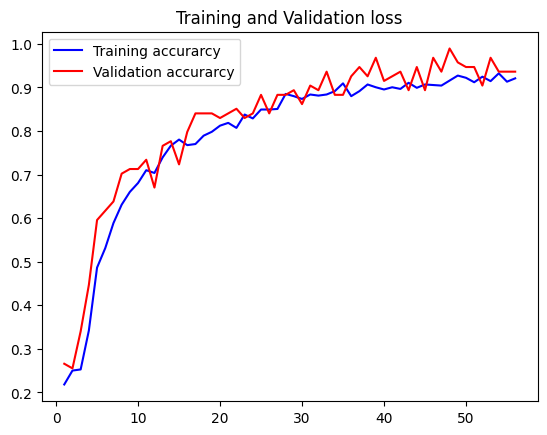

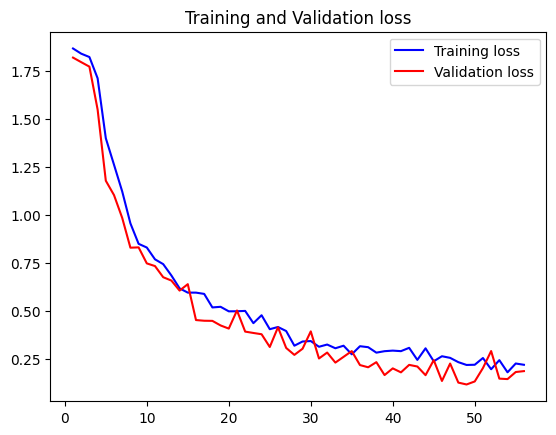

In [ ]:
# The fit method returns a History object,
# can access its history attribute to obtain information about the training process.

import matplotlib.pyplot as plt

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

acc_iteration = range(1, len(accuracy) + 1)

plt.plot(acc_iteration, accuracy, 'b', label="Training accurarcy")
plt.plot(acc_iteration, val_accuracy, 'r', label='Validation accurarcy')
plt.title('Training and Validation loss')
plt.legend()

plt.figure() # to plot new figure

plt.plot(acc_iteration, loss, 'b', label='Training loss')
plt.plot(acc_iteration, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [ ]:
 model.save('/content/drive/MyDrive/emotion/model.hdf5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 53ms/step


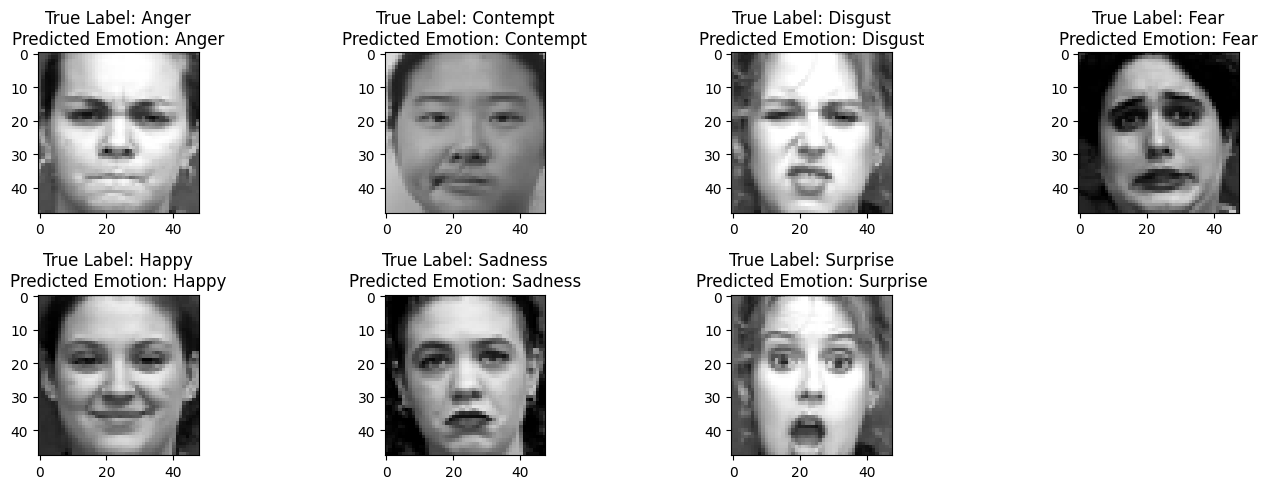

In [ ]:
# Load the saved ResNet model
resnet_model = load_model("/content/drive/MyDrive/dataset/model.hdf5")


# Function to preprocess the input image
#imagepath is an array for images path
def preprocess_input_image(img_path):
   #Load image(vector image)
    img = image.load_img(img_path, target_size=(256,256), color_mode="rgb")
    #puts image in a 2D array
    img_array = image.img_to_array(img)
    #covert vector image to an array because model deals only with arrays
    #dimensions : x ,y , no. of features (3d array)'feature dimension'
    #axis = 0 added to the beginning of array
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize pixel values to between 0 and 1
    return img_array
# Function to get the emotion label
def get_emotion_label(predictions):
    emotion_labels = ['Anger' ,'Contempt' , 'Disgust' , 'Fear' , 'Happy', 'Sadness','Surprise']

    # often used to find the index of the class with the highest predicted probability  every image has probabilities for every 7 classes
    predicted_label_index = np.argmax(predictions)
    return emotion_labels[predicted_label_index]
# List of paths to the four images you want to test
image_paths = [
    "/content/drive/MyDrive/dataset/test/anger/S071_004_00000027.png",
     "/content/drive/MyDrive/dataset/test/contempt/S502_002_00000007.png",
     "/content/drive/MyDrive/dataset/test/disgust/S052_006_00000011.png",
     "/content/drive/MyDrive/dataset/test/fear/S124_003_00000010.png",
    "/content/drive/MyDrive/dataset/test/happy/S129_012_00000010.png",
    "/content/drive/MyDrive/dataset/test/sadness/S115_004_00000016.png",
    "/content/drive/MyDrive/dataset/test/surprise/S052_001_00000013.png"
]
true_labels = ['Anger', 'Contempt', 'Disgust', 'Fear',"Happy","Sadness","Surprise"]
# Preprocess all four input images
input_images = [preprocess_input_image(img_path) for img_path in image_paths]

# Make predictions using the ResNet model for all four images-> "Probiblity"
predictions_list = [resnet_model.predict(img) for img in input_images]

# Get the emotion labels for all four images
predicted_emotions = [get_emotion_label(predictions) for predictions in predictions_list]


# Display the original images and predicted emotion labels
plt.figure(figsize=(15, 5))
for i in range(7):
    # row , column , grid
    plt.subplot(2, 4, i+1)
    #
    img = image.load_img(image_paths[i])
    plt.imshow(img)
    plt.title(f"True Label: {true_labels[i]}\nPredicted Emotion: {predicted_emotions[i]}")
    plt.tight_layout()

plt.show()

